In [1]:
%matplotlib inline
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from math import sqrt
from scipy.spatial.distance import squareform

In [2]:
words = pd.read_csv('data/50words_TEST.csv', index_col = 0, header = None)

### Let's take a look at some of the words 'on average'

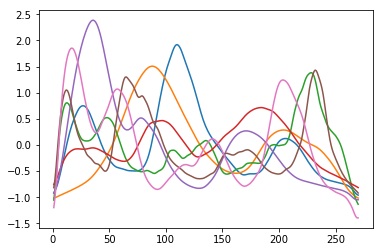

In [3]:
for i in range(7):
    row = words.groupby(words.index).mean().iloc[i]
    row.plot()

### We can also check to see whether the 'average' matches the individual plot for a given type

First, the 'average'

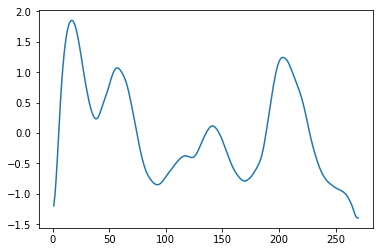

In [5]:
word_type = 7
row = words.groupby(words.index).mean().iloc[word_type-1]
row.plot()

Next the full sample of all those words

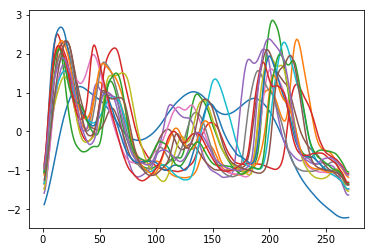

In [6]:
for i in range(words[words.index == word_type].shape[0]):
    row = words[words.index == word_type].iloc[i]
    row.plot()

### Let's try to code up the sensible distance function to describe the distance between two times series

In [7]:
# %load snippets/dtwdistance.py
#courtesy https://en.wikipedia.org/wiki/Dynamic_time_warping

def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [8]:
chosen_words = words[words.index == word_type]
s1 = chosen_words.iloc[2]
s2 = chosen_words.iloc[3]
print(type(s1))
DTWDistance(s1.values, s2.values)

<class 'pandas.core.series.Series'>


6.58261365073929

In [9]:
s3 = words.iloc[0]
DTWDistance(s1.values, s3.values)

11.099002878491204

In [10]:
s3 = words.iloc[0]
DTWDistance(s2.values, s3.values)

10.501580760094857

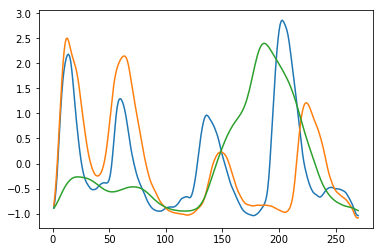

In [11]:
plt.plot(s1)
plt.plot(s2)
plt.plot(s3)

### Compare the performance of Euclidean distance with that of DTDW for s1, s2, s3 as specified above

In [ ]:
# %load snippets/euclidedistance.py

### Can you classify a random row by determining which 'mean' curve it is closest to? How successful is this?

In [20]:
# %load snippets/nearestmean.py
